In [ ]:
!pip install Sastrawi openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DataSEt.xlsx to DataSEt.xlsx


In [ ]:
import pandas as pd

# 1. Baca file Excel
df = pd.read_excel('DataSEt.xlsx', header=None)

# 2. Ambil kolom pertama (yang berisi string panjang dipisahkan koma)
kolom_pertama = df.iloc[:, 0].astype(str)

# 3. Split berdasarkan koma
df_split = kolom_pertama.str.split(',', expand=True)

# 4. Jadikan baris pertama sebagai nama kolom
df_split.columns = df_split.iloc[0]  # Baris pertama = header
df_split = df_split[1:]              # Buang baris pertama dari data
df_split = df_split.reset_index(drop=True)


# 2. Hapus spasi di nama kolom agar akses lebih aman
df_split.columns = df_split.columns.str.strip()
df_split.columns = df_split.columns.str.replace('"', '', regex=False)
# 3. Tampilkan hanya kolom full_text

# 5. Tampilkan hasil
df_split.head(3)  # Tampilkan 3 baris pertama



,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,None,None,None,None
0,1620205351718256640,"""Mon Jan 30 23:47:14 +0000 2023""","""0""","""@GrabID Makasih kak respon nya tadi barusan u...","""1620207035903258625""","""""","""GrabID""","""in""","""""","""0""","""0""","""0""","""https://x.com/cesaaaii/status/162020703590325...","""1370287149162012676""","""cesaaaii""",None,None,None,None
1,1620205351718256640,"""Mon Jan 30 23:46:37 +0000 2023""","""0""","""@o_onegaii Pagi kak. Maaf buat ga nyaman ya M...","""1620206883046068229""","""""","""cesaaaii""","""in""","""Indonesia""","""0""","""1""","""0""","""https://x.com/GrabID/status/1620206883046068229""","""2322081114""","""GrabID""",None,None,None,None
2,1619981336554659840,"""Mon Jan 30 23:45:29 +0000 2023""","""0""","""@longbaobao__ @gojek24jam Grab express skrg a...","""1620206598726774784""","""""","""longbaobao__""","""in""","""""","""0""","""0""","""0""","""https://x.com/camaraderie693/status/162020659...","""169523952""","""camaraderie693""",None,None,None,None


In [ ]:
# Pembersihan Karakter Khusus
# 1. Import modul
import re
import pandas as pd
if 'full_text' not in df_split.columns:
    print("❌ Kolom 'full_text' tidak ditemukan. Kolom yang tersedia:")
    print(df.columns.tolist())
else:
# 2. Lihat beberapa data mentah dari kolom full_text
    #print("Sebelum dibersihkan:\n")
    #print(df_split['full_text'].head(), "\n")

# 3. Fungsi untuk membersihkan teks
    def clean_text(text):
        text = re.sub(r'@[A-Za-z0-9_]+', ' ', text)         # Hapus mention
        text = re.sub(r'#[A-Za-z0-9_]+', ' ', text)         # Hapus hashtag
        text = re.sub(r'http\S+|www.\S+', ' ', text)        # Hapus URL
        text = re.sub(r'\d+', ' ', text)                    # Hapus angka
        text = re.sub(r'[^\w\s]', ' ', text)                # Hapus simbol/tanda baca
        text = text.strip()                                 # Hapus spasi awal/akhir
        text = re.sub(r'\s+', ' ', text)                    # Ganti spasi ganda
        return text

# 4. Terapkan fungsi ke kolom full_text
    df['clean_text'] = df_split['full_text'].astype(str).apply(clean_text)
    df['full_text']=df_split['full_text']

# 5. Tampilkan hasil bersih
    print("Setelah dibersihkan:\n")
    print(df[['full_text', 'clean_text']].head())


Setelah dibersihkan:

                                           full_text  \
0  "@GrabID Makasih kak respon nya tadi barusan u...   
1  "@o_onegaii Pagi kak. Maaf buat ga nyaman ya M...   
2  "@longbaobao__ @gojek24jam Grab express skrg a...   
3  "wts voucher gojek gomart fee 5k #zonauang #vo...   
4     "@Maymytan Bismillah tambahan buat naek gojek"   

                                          clean_text  
0  Makasih kak respon nya tadi barusan udah dibat...  
1  Pagi kak Maaf buat ga nyaman ya Mengenai pemes...  
2  Grab express skrg ada yg car jg kalau ga pake ...  
3       wts voucher gojek gomart fee k cepet cepetan  
4                 Bismillah tambahan buat naek gojek  


In [ ]:
# Case Folding (Lowercasing)
# Ubah teks menjadi lowercase
df['clean_text']  = df['clean_text'].str.lower()

# Tampilkan hasil case folding (beberapa tweet pertama)
print(df['clean_text'] .head())


0    makasih kak respon nya tadi barusan udah dibat...
1    pagi kak maaf buat ga nyaman ya mengenai pemes...
2    grab express skrg ada yg car jg kalau ga pake ...
3         wts voucher gojek gomart fee k cepet cepetan
4                   bismillah tambahan buat naek gojek
Name: clean_text, dtype: object


In [ ]:
#Tokenisasi
# Tokenisasi: pecah teks menjadi list kata
df['tokens'] = df['clean_text'].str.split()

# Tampilkan hasil tokenisasi (contoh beberapa tweet)
print(df['tokens'].head().tolist())


[['makasih', 'kak', 'respon', 'nya', 'tadi', 'barusan', 'udah', 'dibatalin', 'kok', 'aku', 'udah', 'hubungi', 'cs', 'lewat', 'grab', 'nya', 'makasih', 'ya'], ['pagi', 'kak', 'maaf', 'buat', 'ga', 'nyaman', 'ya', 'mengenai', 'pemesanannya', 'aku', 'cek', 'dulu', 'ya', 'kak', 'boleh', 'infoin', 'data', 'kakak', 'dan', 'kode', 'pemesanannya', 'lewat', 'dm', 'dengan', 'ketik', 'format', 'atau', 'ketik', 'chat', 'dengan', 'agent', 'ya', 'kak', 'supaya', 'bisa', 'terhubung', 'dengan', 'aku', 'dan', 'temen', 'terima', 'kasih', 'burhan'], ['grab', 'express', 'skrg', 'ada', 'yg', 'car', 'jg', 'kalau', 'ga', 'pake', 'deliveree', 'dll', 'itu', 'jg', 'bisa', 'kok'], ['wts', 'voucher', 'gojek', 'gomart', 'fee', 'k', 'cepet', 'cepetan'], ['bismillah', 'tambahan', 'buat', 'naek', 'gojek']]


In [ ]:
#Stopword Removal (Filtering Stopword)
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# Siapkan daftar stopword Bahasa Indonesia
stop_factory = StopWordRemoverFactory()
stopwords_list = stop_factory.get_stop_words()  # daftar stopword default

# Fungsi untuk hapus stopword dari list token
#def remove_stopwords(token_list):
#    tokens_no_sw = [word for word in token_list if word not in stopwords_list]
#    return tokens_no_sw

def remove_stopwords(token_list):
    if not isinstance(token_list, list):
        return []  # Atau bisa juga: return token_list jika kamu ingin melewatkannya
    return [word for word in token_list if word not in stopwords_list]

# Terapkan ke kolom tokens
df['filtered_tokens'] = df['tokens'].apply(remove_stopwords)

# Tampilkan hasil setelah stopword removal (contoh beberapa tweet)
print(df['filtered_tokens'].head().tolist())
df['tokens'].apply(type).value_counts()

[['makasih', 'kak', 'respon', 'nya', 'tadi', 'barusan', 'udah', 'dibatalin', 'kok', 'aku', 'udah', 'hubungi', 'cs', 'lewat', 'grab', 'nya', 'makasih'], ['pagi', 'kak', 'maaf', 'buat', 'ga', 'nyaman', 'mengenai', 'pemesanannya', 'aku', 'cek', 'dulu', 'kak', 'infoin', 'data', 'kakak', 'kode', 'pemesanannya', 'lewat', 'dm', 'ketik', 'format', 'ketik', 'chat', 'agent', 'kak', 'terhubung', 'aku', 'temen', 'terima', 'kasih', 'burhan'], ['grab', 'express', 'skrg', 'yg', 'car', 'jg', 'kalau', 'ga', 'pake', 'deliveree', 'jg', 'kok'], ['wts', 'voucher', 'gojek', 'gomart', 'fee', 'k', 'cepet', 'cepetan'], ['bismillah', 'tambahan', 'buat', 'naek', 'gojek']]


,count
tokens,
<class 'list'>,9315
<class 'float'>,1


In [ ]:
#Stemming dengan Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Siapkan stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk stemming list token
def stem_tokens(token_list):
    # Gabungkan kembali menjadi kalimat tunggal
    sentence = ' '.join(token_list)
    # Stem kalimat tersebut
    stemmed_sentence = stemmer.stem(sentence)
    # Pecah kembali menjadi list token hasil stemming (opsional, jika ingin list)
    stemmed_tokens = stemmed_sentence.split()
    return stemmed_tokens

# Terapkan stemming ke kolom filtered_tokens
df['stemmed_tokens'] = df['filtered_tokens'].apply(stem_tokens)

# Buat kolom teks final dengan menggabungkan kembali token yang telah distem
df['preprocessed_text'] = df['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens))

# Tampilkan hasil stemming (contoh beberapa tweet)
print(df['preprocessed_text'].head())


0    makasih kak respon nya tadi barusan udah dibat...
1    pagi kak maaf buat ga nyaman kena mesan aku ce...
2    grab express skrg yg car jg kalau ga pake deli...
3         wts voucher gojek gomart fee k cepet cepetan
4                     bismillah tambah buat naek gojek
Name: preprocessed_text, dtype: object


In [ ]:
# Simpan hasil akhir ke file Excel
# (Hanya kolom teks asli dan teks preprocessed yang disimpan untuk ringkasnya)
df['full_text']=df_split['full_text']
output_df = df[['full_text', 'preprocessed_text']]  # memilih kolom yang ingin disimpan (opsional)
output_df.to_excel('preprocessed_tweets.xlsx', index=False)

print("\nFile 'preprocessed_tweets.xlsx' telah berhasil disimpan.")



File 'preprocessed_tweets.xlsx' telah berhasil disimpan.


In [ ]:
from transformers import pipeline

# Pastikan text berbentuk string
df['preprocessed_text'] = df['preprocessed_text'].astype(str)

df = df[df['preprocessed_text'].str.strip() != '']

# Batasi panjang teks agar tidak error
df['preprocessed_text'] = df['preprocessed_text'].apply(lambda x: x[:512])

# Load pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")

# Gunakan batch prediction
results = sentiment_pipeline(df['preprocessed_text'].tolist(), batch_size=8)

# Ambil label-nya
df['sentiment'] = [r['label'] for r in results]

# Tampilkan hasil
output_df=df[['preprocessed_text', 'sentiment']]
output_df.to_excel('hasil_sentimen.xlsx', index=False)
print(df[['preprocessed_text', 'sentiment']].head())



Device set to use cpu


                                   preprocessed_text sentiment
0  makasih kak respon nya tadi barusan udah dibat...   neutral
1  pagi kak maaf buat ga nyaman kena mesan aku ce...   neutral
2  grab express skrg yg car jg kalau ga pake deli...   neutral
3       wts voucher gojek gomart fee k cepet cepetan   neutral
4                   bismillah tambah buat naek gojek  positive


In [ ]:
"""
Analisis Sentimen Bahasa Indonesia Menggunakan IndoBERT
--------------------------------------------------------
Script ini melakukan analisis sentimen pada teks berbahasa Indonesia menggunakan model IndoBERT.
Fitur:
- Memuat dataset dari file CSV
- Melakukan preprocessing data
- Menggunakan model IndoBERT untuk klasifikasi sentimen
- Pelatihan model (opsional)
- Prediksi sentimen pada contoh teks
"""

import os
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments
)
from torch.utils.data import Dataset, DataLoader

# Konfigurasi
MODEL_NAME = "indobenchmark/indobert-base-p1"
MAX_LENGTH = 128
BATCH_SIZE = 16
LEARNING_RATE = 2e-5
NUM_EPOCHS = 3
RANDOM_SEED = 42

# Memastikan hasil yang konsisten
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

def load_dataset(filepath):
    """
    Memuat dataset dari file CSV dan menampilkan informasi dasar.

    Args:
        filepath (str): Path ke file CSV

    Returns:
        pd.DataFrame: DataFrame yang berisi data sentimen
    """
    try:
        df = pd.read_csv(filepath, sep=';')
        print(f"Dataset berhasil dimuat dengan {len(df)} baris.")
        return df
    except FileNotFoundError:
        print(f"Error: File '{filepath}' tidak ditemukan.")
        return None
    except Exception as e:
        print(f"Error saat memuat dataset: {str(e)}")
        return None

def explore_dataset(df):
    """
    Mengeksplorasi dan menampilkan informasi dataset.

    Args:
        df (pd.DataFrame): DataFrame yang akan dieksplorasi
    """
    print("\n--- Informasi Dataset ---")
    print(f"Kolom dalam dataset: {df.columns.tolist()}")
    print("\nBeberapa baris pertama:")
    print(df.head(3))

    if 'label' in df.columns:
        print("\nDistribusi label:")
        print(df['label'].value_counts())

    # Memeriksa nilai yang hilang
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print("\nNilai yang hilang per kolom:")
        print(missing_values[missing_values > 0])

def preprocess_data(df, text_column='sentiment', label_column='label'):
    """
    Memproses data mentah dan mengkodekan label.

    Args:
        df (pd.DataFrame): DataFrame yang akan diproses
        text_column (str): Nama kolom yang berisi teks
        label_column (str): Nama kolom yang berisi label

    Returns:
        tuple: (preprocessed_df, label_encoder)
    """
    # Pastikan teks tidak mengandung nilai NaN
    df[text_column] = df[text_column].astype(str)

    # Mengkodekan label
    label_encoder = LabelEncoder()
    df['label_encoded'] = label_encoder.fit_transform(df[label_column])

    print(f"\nLabel yang dikodekan: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")

    return df, label_encoder

class SentimentDataset(Dataset):
    """
    Dataset PyTorch untuk data sentimen.
    """
    def __init__(self, texts, labels, tokenizer, max_length=128):
        """
        Menginisialisasi dataset.

        Args:
            texts (list): Daftar teks
            labels (list): Daftar label yang dikodekan
            tokenizer: Tokenizer dari Hugging Face
            max_length (int): Panjang maksimum urutan
        """
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        # Hilangkan dimensi batch yang ditambahkan oleh tokenizer
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

def create_dataloaders(df, tokenizer, text_column='sentiment', label_column='label_encoded',
                       test_size=0.2, max_length=128, batch_size=16):
    """
    Membuat DataLoader untuk pelatihan dan validasi.

    Args:
        df (pd.DataFrame): DataFrame yang berisi data
        tokenizer: Tokenizer dari Hugging Face
        text_column (str): Nama kolom yang berisi teks
        label_column (str): Nama kolom yang berisi label yang dikodekan
        test_size (float): Proporsi data yang digunakan untuk validasi
        max_length (int): Panjang maksimum urutan
        batch_size (int): Ukuran batch

    Returns:
        tuple: (train_dataloader, val_dataloader)
    """
    # Membagi data
    train_df, val_df = train_test_split(
        df, test_size=test_size, random_state=RANDOM_SEED, stratify=df[label_column]
    )

    # Membuat dataset
    train_dataset = SentimentDataset(
        train_df[text_column].tolist(),
        train_df[label_column].tolist(),
        tokenizer,
        max_length
    )

    val_dataset = SentimentDataset(
        val_df[text_column].tolist(),
        val_df[label_column].tolist(),
        tokenizer,
        max_length
    )

    # Membuat dataloader
    train_dataloader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True
    )

    val_dataloader = DataLoader(
        val_dataset,
        batch_size=batch_size
    )

    print(f"\nData dibagi menjadi {len(train_dataset)} sampel pelatihan dan {len(val_dataset)} sampel validasi.")

    return train_dataloader, val_dataloader

def load_model(model_name, num_labels):
    """
    Memuat model dan tokenizer.

    Args:
        model_name (str): Nama model di Hugging Face Hub
        num_labels (int): Jumlah label untuk klasifikasi

    Returns:
        tuple: (model, tokenizer)
    """
    try:
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModelForSequenceClassification.from_pretrained(
            model_name,
            num_labels=num_labels
        )
        print(f"\nModel {model_name} berhasil dimuat dengan {num_labels} label.")
        return model, tokenizer
    except Exception as e:
        print(f"Error saat memuat model: {str(e)}")
        return None, None

def train_model(model, train_dataloader, val_dataloader, learning_rate=2e-5, num_epochs=3):
    """
    Melatih model.

    Args:
        model: Model dari Hugging Face
        train_dataloader: DataLoader untuk pelatihan
        val_dataloader: DataLoader untuk validasi
        learning_rate (float): Learning rate
        num_epochs (int): Jumlah epoch

    Returns:
        model: Model yang telah dilatih
    """
    # Menggunakan device yang tersedia (GPU jika ada)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"\nMelatih model menggunakan {device}")

    model.to(device)

    # Mengatur optimizer
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

    # Loop pelatihan
    for epoch in range(num_epochs):
        # Mode pelatihan
        model.train()
        train_loss = 0

        print(f"\nEpoch {epoch + 1}/{num_epochs}")

        for batch in train_dataloader:
            # Pindahkan batch ke device
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # Forward pass
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            loss = outputs.loss
            train_loss += loss.item()

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Tampilkan loss rata-rata
        avg_train_loss = train_loss / len(train_dataloader)
        print(f"Training loss: {avg_train_loss:.4f}")

        # Evaluasi
        model.eval()
        val_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for batch in val_dataloader:
                # Pindahkan batch ke device
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                # Forward pass
                outputs = model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    labels=labels
                )

                loss = outputs.loss
                val_loss += loss.item()

                # Hitung akurasi
                predictions = torch.argmax(outputs.logits, dim=1)
                correct += (predictions == labels).sum().item()
                total += labels.size(0)

        # Tampilkan loss dan akurasi validasi
        avg_val_loss = val_loss / len(val_dataloader)
        accuracy = correct / total
        print(f"Validation loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4f}")

    return model

def predict_sentiment(text, model, tokenizer, label_encoder, device=None):
    """
    Memprediksi sentimen dari teks.

    Args:
        text (str): Teks yang akan diprediksi sentimennya
        model: Model dari Hugging Face
        tokenizer: Tokenizer dari Hugging Face
        label_encoder: LabelEncoder yang digunakan untuk mengkodekan label
        device: Perangkat untuk menjalankan model (default: None, otomatis deteksi)

    Returns:
        tuple: (predicted_label, confidence)
    """
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model.to(device)
    model.eval()

    # Tokenisasi teks
    encoding = tokenizer(
        text,
        truncation=True,
        padding='max_length',
        max_length=MAX_LENGTH,
        return_tensors='pt'
    )

    # Pindahkan encoding ke device
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    # Prediksi
    with torch.no_grad():
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

    # Ambil probabilitas dengan softmax
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)

    # Ambil indeks dengan probabilitas tertinggi
    predicted_idx = torch.argmax(probabilities, dim=1).item()
    confidence = probabilities[0][predicted_idx].item()

    # Dekode label
    predicted_label = label_encoder.inverse_transform([predicted_idx])[0]

    return predicted_label, confidence

def main():
    # Langkah 1: Memuat dataset
    filepath = 'hasil_sentimen.csv'
    sentiment_df = load_dataset(filepath)

    if sentiment_df is None:
        return

    # Langkah 2: Eksplorasi dataset
    explore_dataset(sentiment_df)

    # Langkah 3: Preprocessing data
    sentiment_df, label_encoder = preprocess_data(sentiment_df)

    # Langkah 4: Memuat model dan tokenizer
    model, tokenizer = load_model(MODEL_NAME, len(label_encoder.classes_))

    if model is None or tokenizer is None:
        return

    # Langkah 5: Membuat dataloader
    train_dataloader, val_dataloader = create_dataloaders(
        sentiment_df,
        tokenizer,
        max_length=MAX_LENGTH,
        batch_size=BATCH_SIZE
    )

    # Langkah 6: Melatih model (opsional)
    # Hapus komentar baris berikut untuk melatih model
    # model = train_model(model, train_dataloader, val_dataloader, LEARNING_RATE, NUM_EPOCHS)

    # Langkah 7: Prediksi pada contoh
    sample_text = sentiment_df['sentiment'][0]
    predicted_label, confidence = predict_sentiment(
        sample_text, model, tokenizer, label_encoder
    )

    print("\n--- Hasil Prediksi ---")
    print(f"Teks: {sample_text}")
    print(f"Label yang diprediksi: {predicted_label} (confidence: {confidence:.4f})")

    # Bonus: Contoh prediksi tambahan
    print("\n--- Contoh Prediksi Tambahan ---")
    test_texts = [
        "Pelayanan sangat baik dan ramah",
        "Produk ini mengecewakan, kualitasnya buruk",
        "Saya biasa saja dengan produk ini"
    ]

    for text in test_texts:
        predicted_label, confidence = predict_sentiment(
            text, model, tokenizer, label_encoder
        )
        print(f"Teks: {text}")
        print(f"Label yang diprediksi: {predicted_label} (confidence: {confidence:.4f})")
        print()

if __name__ == "__main__":
    main()

Dataset berhasil dimuat dengan 8669 baris.

--- Informasi Dataset ---
Kolom dalam dataset: ['sentiment', 'label']

Beberapa baris pertama:
                                           sentiment    label
0  grabid makasih kak respon nya tadi barusan uda...  Positif
1  o onegaii pagi kak maaf buat ga nyaman kena me...   Netral
2  longbaobao gojek24jam grab express skrg yg car...   Netral

Distribusi label:
label
Negatif    3711
Netral     3249
Positif    1709
Name: count, dtype: int64

Label yang dikodekan: {'Negatif': 0, 'Netral': 1, 'Positif': 2}


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You 


Model indobenchmark/indobert-base-p1 berhasil dimuat dengan 3 label.

Data dibagi menjadi 6935 sampel pelatihan dan 1734 sampel validasi.

--- Hasil Prediksi ---
Teks: grabid makasih kak respon nya tadi barusan udah dibatalin kok aku udah hubung cs lewat grab nya makasih
Label yang diprediksi: Netral (confidence: 0.3727)

--- Contoh Prediksi Tambahan ---
Teks: Pelayanan sangat baik dan ramah
Label yang diprediksi: Netral (confidence: 0.4056)

Teks: Produk ini mengecewakan, kualitasnya buruk
Label yang diprediksi: Negatif (confidence: 0.4039)

Teks: Saya biasa saja dengan produk ini
Label yang diprediksi: Netral (confidence: 0.4185)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#definisi arsitektur untuk DNN dan LSTM menggunakan Keras (TensorFlow)
from tensorflow.keras import layers, models

num_classes = 3  # positif, netral, negatif

# Model DNN
model_dnn = models.Sequential([
    layers.Input(shape=(768,)),                      # input vector 768-dim
    layers.Dense(256, activation='relu'),            # hidden layer 1
    layers.Dense(128, activation='relu'),            # hidden layer 2
    layers.Dense(num_classes, activation='softmax')  # output layer
])
model_dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_dnn.summary()  # melihat arsitektur DNN

# Model LSTM
sequence_length = 128  # asumsi panjang maksimal tweet setelah tokenisasi
embedding_dim = 768    # IndoBERT embedding dimension per token
inputs = layers.Input(shape=(sequence_length, embedding_dim))
x = layers.Masking(mask_value=0.0)(inputs)           # masking optional, if padded
x = layers.LSTM(64)(x)                               # LSTM layer with 64 units
outputs = layers.Dense(num_classes, activation='softmax')(x)
model_lstm = models.Model(inputs, outputs)
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.summary()  # melihat arsitektur LSTM



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,147 (899.01 KB)

 Trainable params: 230,147 (899.01 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 768)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 128, 768)  │          0 │ input_layer_1[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking (Masking)   │ (None, 128, 768)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any (Any)           │ (None, 128)       │          0 │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 64)        │    213,248 │ masking[0][0],    │
│                     │                   │            │ any[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 3)         │        195 │ lstm[0][0]        │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 213,443 (833.76 KB)

 Trainable params: 213,443 (833.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# --- Contoh dummy dataframe ---
# Anggap kita punya embedding hasil BERT dan label 'sentiment' di DataFrame
num_samples = 100
num_features = 9303
num_classes = 3

# Buat dummy data
embeddings = np.random.rand(num_samples, num_features)
sentiments = np.random.randint(0, num_classes, size=num_samples)

# Buat DataFrame
df = pd.DataFrame(embeddings)
df['sentiment'] = sentiments

# --- Ambil fitur dan label dari df ---
features = df.drop(columns=['sentiment']).values  # shape: (100, 768)
labels = df['sentiment'].values                   # shape: (100,)

# One-hot encode labels
labels_onehot = np.eye(num_classes)[labels]

# Define KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_metrics = []

# Dummy model builder
def build_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(features.shape[1],)),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation
for train_index, val_index in kf.split(features):
    X_train, X_val = features[train_index], features[val_index]
    y_train, y_val = labels_onehot[train_index], labels_onehot[val_index]

    model = build_model()
    start_time = time.time()
    model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)
    training_time = time.time() - start_time

    y_pred_probs = model.predict(X_val)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_val, axis=1)

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

    fold_metrics.append((acc, prec, rec, f1, training_time))

# Average results
avg_metrics = np.mean(fold_metrics, axis=0)

print("Average Accuracy: {:.4f}".format(avg_metrics[0]))
print("Average Precision: {:.4f}".format(avg_metrics[1]))
print("Average Recall: {:.4f}".format(avg_metrics[2]))
print("Average F1-Score: {:.4f}".format(avg_metrics[3]))
print("Average Training Time: {:.2f} seconds".format(avg_metrics[4]))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Average Accuracy: 0.3300
Average Precision: 0.1845
Average Recall: 0.3082
Average F1-Score: 0.1726
Average Training Time: 1.87 seconds


In [ ]:
"""
Perbandingan Model DNN dan LSTM untuk Analisis Sentimen Bahasa Indonesia
------------------------------------------------------------------------
Script ini memperluas model analisis sentimen sebelumnya dengan membandingkan model:
1. DNN (Dense Neural Network) dengan IndoBERT embedding
2. LSTM (Long Short-Term Memory) dengan IndoBERT embedding

Fitur:
- Memuat dataset dari file CSV
- Preprocessing data text dan label
- Ekstraksi fitur dari IndoBERT
- Implementasi dan pelatihan model DNN
- Implementasi dan pelatihan model LSTM
- Evaluasi dan perbandingan performa kedua model
- Visualisasi hasil perbandingan
"""

import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from transformers import AutoTokenizer, AutoModel
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm

# Konfigurasi
CONFIG = {
    "model_name": "indobenchmark/indobert-base-p1",
    "max_length": 128,
    "batch_size": 16,
    "learning_rate": 2e-5,
    "num_epochs": 5,
    "random_seed": 42,
    "hidden_size": 256,
    "dropout_rate": 0.3,
    "lstm_layers": 2,
}

# Memastikan hasil yang konsisten
torch.manual_seed(CONFIG["random_seed"])
np.random.seed(CONFIG["random_seed"])


def load_dataset(filepath):
    """Memuat dataset dari file CSV."""
    try:
        df = pd.read_csv(filepath, sep=";")
        print(f"Dataset berhasil dimuat dengan {len(df)} baris.")
        return df
    except Exception as e:
        print(f"Error saat memuat dataset: {str(e)}")
        return None


def preprocess_data(df, text_column="sentiment", label_column="label"):
    """Preprocessing data mentah dan mengkodekan label."""
    df[text_column] = df[text_column].astype(str)
    label_encoder = LabelEncoder()
    df["label_encoded"] = label_encoder.fit_transform(df[label_column])
    print(
        f"\nLabel yang dikodekan: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}"
    )
    return df, label_encoder


class BertEmbeddingExtractor:
    """Ekstraktor embedding dari model BERT."""

    def __init__(self, model_name, device=None):
        self.device = device or torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModel.from_pretrained(model_name).to(self.device).eval()

    def extract_embeddings(self, texts, max_length=128, batch_size=32, strategy="cls"):
        """Mengekstrak embedding dari teks."""
        embeddings = []
        for i in range(0, len(texts), batch_size):
            batch_texts = texts[i : i + batch_size]
            inputs = self.tokenizer(
                batch_texts, padding="max_length", truncation=True, max_length=max_length, return_tensors="pt"
            )
            inputs = {k: v.to(self.device) for k, v in inputs.items()}
            with torch.no_grad():
                outputs = self.model(**inputs)
                if strategy == "cls":
                    batch_emb = outputs.last_hidden_state[:, 0, :].cpu().numpy()
                elif strategy == "mean":
                    mask = inputs["attention_mask"].unsqueeze(-1)
                    batch_emb = (outputs.last_hidden_state * mask).sum(1) / mask.sum(1)
                    batch_emb = batch_emb.cpu().numpy()
                else:
                    raise ValueError("Strategi tidak valid.")
            embeddings.append(batch_emb)
        return np.vstack(embeddings)


class DNNModel(nn.Module):
    """Model DNN untuk klasifikasi sentimen."""

    def __init__(self, input_dim, hidden_dim, output_dim, dropout_rate):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim // 2, output_dim),
        )

    def forward(self, x):
        return self.network(x)


class LSTMModel(nn.Module):
    """Model LSTM untuk klasifikasi sentimen."""

    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout_rate):
        super().__init__()
        self.lstm = nn.LSTM(
            input_dim,
            hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout_rate if num_layers > 1 else 0,
            bidirectional=True,
        )
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        lstm_out, _ = self.lstm(x)
        out = self.dropout(lstm_out[:, -1, :])
        return self.fc(out)


def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    """Melatih dan mengevaluasi model."""
    model.to(device)
    history = {"train_loss": [], "val_loss": [], "val_acc": []}
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            loss = criterion(model(inputs), labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        history["train_loss"].append(train_loss / len(train_loader))

        model.eval()
        val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        history["val_loss"].append(val_loss / len(val_loader))
        history["val_acc"].append(correct / total)

    return model, history


def main():
    """Fungsi utama."""
    filepath = "hasil_sentimen.csv"
    df = load_dataset(filepath)
    if df is None:
        return

    df, label_encoder = preprocess_data(df)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    extractor = BertEmbeddingExtractor(CONFIG["model_name"], device)
    embeddings = extractor.extract_embeddings(df["sentiment"].tolist(), max_length=CONFIG["max_length"])
    X_train, X_temp, y_train, y_temp = train_test_split(
        embeddings, df["label_encoded"].values, test_size=0.4, random_state=CONFIG["random_seed"], stratify=df["label_encoded"]
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=CONFIG["random_seed"], stratify=y_temp
    )

    train_loader = DataLoader(TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train)), batch_size=CONFIG["batch_size"], shuffle=True)
    val_loader = DataLoader(TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val)), batch_size=CONFIG["batch_size"])
    test_loader = DataLoader(TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test)), batch_size=CONFIG["batch_size"])

    input_dim = embeddings.shape[1]
    num_classes = len(label_encoder.classes_)

    dnn_model = DNNModel(input_dim, CONFIG["hidden_size"], num_classes, CONFIG["dropout_rate"])
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(dnn_model.parameters(), lr=CONFIG["learning_rate"])

    print("\nTraining DNN Model...")
    dnn_model, dnn_history = train_model(dnn_model, train_loader, val_loader, criterion, optimizer, CONFIG["num_epochs"], device)

    print("\nEvaluating on Test Data...")
    dnn_model.eval()
    test_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = dnn_model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    print(f"Test Accuracy: {correct / total:.2f}")

if __name__ == "__main__":
    main()

Dataset berhasil dimuat dengan 8669 baris.

Label yang dikodekan: {'Negatif': 0, 'Netral': 1, 'Positif': 2}


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Training DNN Model...


Epoch 5/5: 100%|██████████| 326/326 [00:00<00:00, 542.76it/s]



Evaluating on Test Data...
Test Accuracy: 0.65


Dataset berhasil dimuat dengan 8669 baris.
Label yang dikodekan: {'Negatif': 0, 'Netral': 1, 'Positif': 2}


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Training DNN Model...


Epoch 5/5: 100%|██████████| 326/326 [00:00<00:00, 413.10it/s]



Training LSTM Model...


Epoch 5/5: 100%|██████████| 326/326 [00:10<00:00, 30.36it/s]



Visualizing Model Performance...


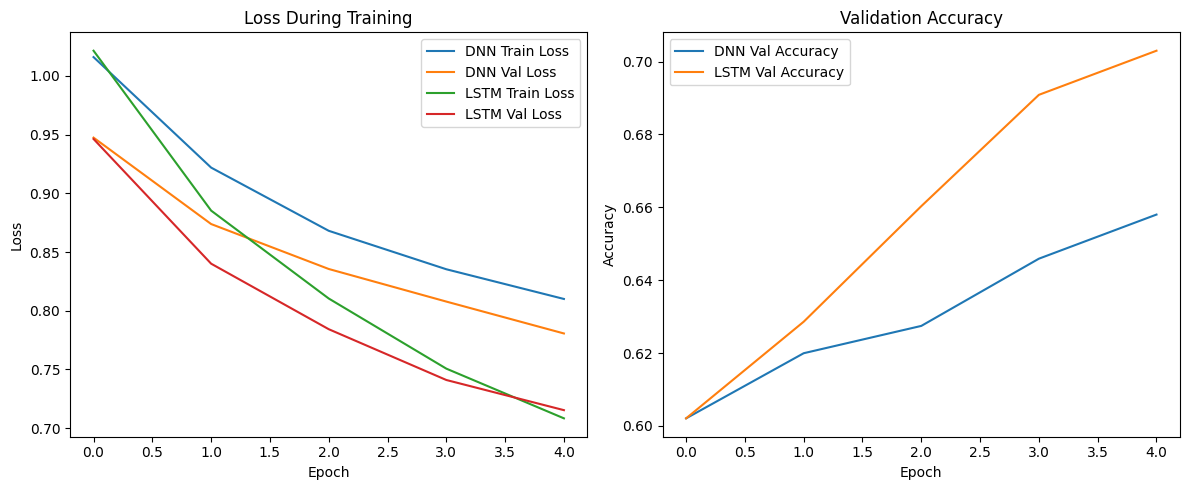


Test Accuracy for DNN: 0.65
Test Accuracy for LSTM: 0.68


In [ ]:
"""
Perbandingan Model DNN dan LSTM untuk Analisis Sentimen Bahasa Indonesia
------------------------------------------------------------------------
Script ini memperluas model analisis sentimen sebelumnya dengan membandingkan model:
1. DNN (Dense Neural Network) dengan IndoBERT embedding
2. LSTM (Long Short-Term Memory) dengan IndoBERT embedding

Fitur:
- Memuat dataset dari file CSV
- Preprocessing data text dan label
- Ekstraksi fitur dari IndoBERT
- Implementasi dan pelatihan model DNN
- Implementasi dan pelatihan model LSTM
- Evaluasi dan perbandingan performa kedua model
- Visualisasi hasil perbandingan
"""

import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from transformers import AutoTokenizer, AutoModel
import matplotlib.pyplot as plt
from tqdm import tqdm

# Konfigurasi
CONFIG = {
    "model_name": "indobenchmark/indobert-base-p1",
    "max_length": 128,
    "batch_size": 16,
    "learning_rate": 2e-5,
    "num_epochs": 5,
    "random_seed": 42,
    "hidden_size": 256,
    "dropout_rate": 0.3,
    "lstm_layers": 2,
}

torch.manual_seed(CONFIG["random_seed"])
np.random.seed(CONFIG["random_seed"])


def visualize_performance(histories, model_names):
    """Visualisasi performa model selama pelatihan."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot training losses
    for history, name in zip(histories, model_names):
        axes[0].plot(history["train_loss"], label=f"{name} Train Loss")
        axes[0].plot(history["val_loss"], label=f"{name} Val Loss")
    axes[0].set_title("Loss During Training")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Loss")
    axes[0].legend()

    # Plot validation accuracy
    for history, name in zip(histories, model_names):
        axes[1].plot(history["val_acc"], label=f"{name} Val Accuracy")
    axes[1].set_title("Validation Accuracy")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Accuracy")
    axes[1].legend()

    plt.tight_layout()
    plt.savefig("model_comparison.png")
    plt.show()


def load_dataset(filepath):
    """Memuat dataset dari file CSV."""
    try:
        df = pd.read_csv(filepath, sep=";")
        print(f"Dataset berhasil dimuat dengan {len(df)} baris.")
        return df
    except Exception as e:
        print(f"Error saat memuat dataset: {str(e)}")
        return None


def preprocess_data(df, text_column="sentiment", label_column="label"):
    """Preprocessing data mentah dan mengkodekan label."""
    df[text_column] = df[text_column].astype(str)
    label_encoder = LabelEncoder()
    df["label_encoded"] = label_encoder.fit_transform(df[label_column])
    print(f"Label yang dikodekan: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")
    return df, label_encoder


class BertEmbeddingExtractor:
    """Ekstraktor embedding dari model BERT."""

    def __init__(self, model_name, device=None):
        self.device = device or torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModel.from_pretrained(model_name).to(self.device).eval()

    def extract_embeddings(self, texts, max_length=128, batch_size=32, strategy="cls"):
        """Mengekstrak embedding dari teks."""
        embeddings = []
        for i in range(0, len(texts), batch_size):
            batch_texts = texts[i : i + batch_size]
            inputs = self.tokenizer(
                batch_texts, padding="max_length", truncation=True, max_length=max_length, return_tensors="pt"
            )
            inputs = {k: v.to(self.device) for k, v in inputs.items()}
            with torch.no_grad():
                outputs = self.model(**inputs)
                if strategy == "cls":
                    batch_emb = outputs.last_hidden_state[:, 0, :].cpu().numpy()
                elif strategy == "mean":
                    mask = inputs["attention_mask"].unsqueeze(-1)
                    batch_emb = (outputs.last_hidden_state * mask).sum(1) / mask.sum(1)
                    batch_emb = batch_emb.cpu().numpy()
                else:
                    raise ValueError("Strategi tidak valid.")
            embeddings.append(batch_emb)
        return np.vstack(embeddings)


class DNNModel(nn.Module):
    """Model DNN untuk klasifikasi sentimen."""

    def __init__(self, input_dim, hidden_dim, output_dim, dropout_rate):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim // 2, output_dim),
        )

    def forward(self, x):
        return self.network(x)


class LSTMModel(nn.Module):
    """Model LSTM untuk klasifikasi sentimen."""

    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout_rate):
        super().__init__()
        self.lstm = nn.LSTM(
            input_dim,
            hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout_rate if num_layers > 1 else 0,
            bidirectional=True,
        )
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        lstm_out, _ = self.lstm(x)
        out = self.dropout(lstm_out[:, -1, :])
        return self.fc(out)


def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    """Melatih dan mengevaluasi model."""
    model.to(device)
    history = {"train_loss": [], "val_loss": [], "val_acc": []}
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            loss = criterion(model(inputs), labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        history["train_loss"].append(train_loss / len(train_loader))

        model.eval()
        val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        history["val_loss"].append(val_loss / len(val_loader))
        history["val_acc"].append(correct / total)

    return model, history


def main():
    """Fungsi utama."""
    filepath = "hasil_sentimen.csv"
    df = load_dataset(filepath)
    if df is None:
        return

    df, label_encoder = preprocess_data(df)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    extractor = BertEmbeddingExtractor(CONFIG["model_name"], device)
    embeddings = extractor.extract_embeddings(df["sentiment"].tolist(), max_length=CONFIG["max_length"])
    X_train, X_temp, y_train, y_temp = train_test_split(
        embeddings, df["label_encoded"].values, test_size=0.4, random_state=CONFIG["random_seed"], stratify=df["label_encoded"]
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=CONFIG["random_seed"], stratify=y_temp
    )

    train_loader = DataLoader(TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train)), batch_size=CONFIG["batch_size"], shuffle=True)
    val_loader = DataLoader(TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val)), batch_size=CONFIG["batch_size"])
    test_loader = DataLoader(TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test)), batch_size=CONFIG["batch_size"])

    input_dim = embeddings.shape[1]
    num_classes = len(label_encoder.classes_)

    # DNN Model
    dnn_model = DNNModel(input_dim, CONFIG["hidden_size"], num_classes, CONFIG["dropout_rate"])
    dnn_criterion = nn.CrossEntropyLoss()
    dnn_optimizer = optim.Adam(dnn_model.parameters(), lr=CONFIG["learning_rate"])

    print("\nTraining DNN Model...")
    dnn_model, dnn_history = train_model(dnn_model, train_loader, val_loader, dnn_criterion, dnn_optimizer, CONFIG["num_epochs"], device)

    # LSTM Model
    lstm_model = LSTMModel(input_dim, CONFIG["hidden_size"], num_classes, CONFIG["lstm_layers"], CONFIG["dropout_rate"])
    lstm_criterion = nn.CrossEntropyLoss()
    lstm_optimizer = optim.Adam(lstm_model.parameters(), lr=CONFIG["learning_rate"])

    print("\nTraining LSTM Model...")
    lstm_model, lstm_history = train_model(lstm_model, train_loader, val_loader, lstm_criterion, lstm_optimizer, CONFIG["num_epochs"], device)

    print("\nVisualizing Model Performance...")
    visualize_performance([dnn_history, lstm_history], ["DNN", "LSTM"])

    # Evaluate on Test Data
    dnn_model.eval()
    lstm_model.eval()
    dnn_correct, lstm_correct, total = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            dnn_outputs = dnn_model(inputs)
            lstm_outputs = lstm_model(inputs)

            _, dnn_preds = torch.max(dnn_outputs, 1)
            _, lstm_preds = torch.max(lstm_outputs, 1)

            dnn_correct += (dnn_preds == labels).sum().item()
            lstm_correct += (lstm_preds == labels).sum().item()
            total += labels.size(0)

    print(f"\nTest Accuracy for DNN: {dnn_correct / total:.2f}")
    print(f"Test Accuracy for LSTM: {lstm_correct / total:.2f}")


if __name__ == "__main__":
    main()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Training DNN Model...


Epoch 5/5: 100%|██████████| 326/326 [00:00<00:00, 407.74it/s]



Training LSTM Model...


Epoch 5/5: 100%|██████████| 326/326 [00:11<00:00, 28.38it/s]



Metrics for DNN:
Accuracy: 0.6528
Precision: 0.6717
Recall: 0.6528
Specificity: 0.8066
F1-Score: 0.6092

Metrics for LSTM:
Accuracy: 0.6776
Precision: 0.6718
Recall: 0.6776
Specificity: 0.8257
F1-Score: 0.6653


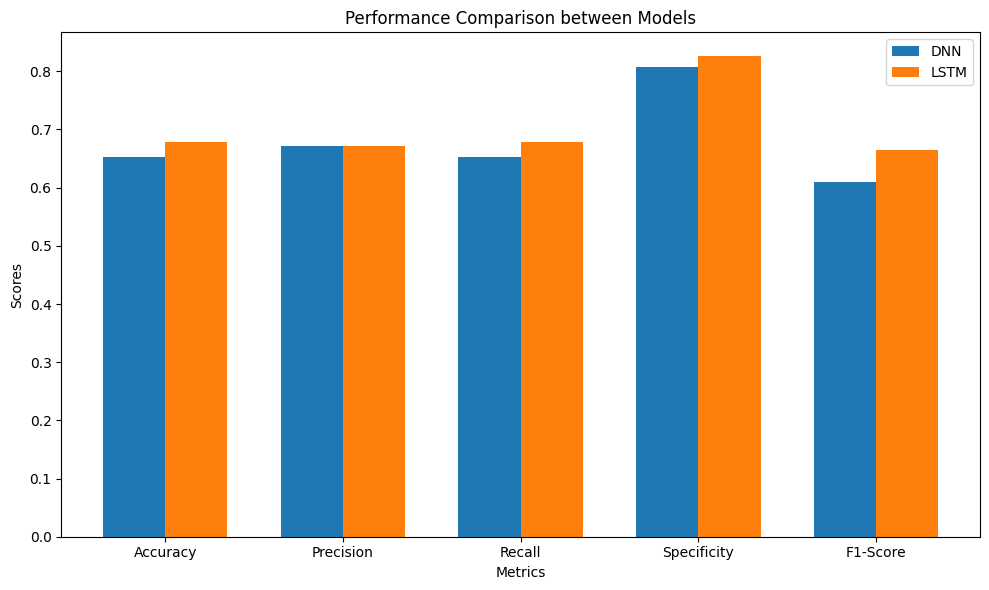

In [ ]:
"""
Perbandingan Model DNN dan LSTM untuk Analisis Sentimen Bahasa Indonesia
------------------------------------------------------------------------
Script ini memperluas model analisis sentimen sebelumnya dengan membandingkan model:
1. DNN (Dense Neural Network) dengan IndoBERT embedding
2. LSTM (Long Short-Term Memory) dengan IndoBERT embedding

Fitur:
- Memuat dataset dari file CSV
- Preprocessing data text dan label
- Ekstraksi fitur dari IndoBERT
- Implementasi dan pelatihan model DNN
- Implementasi dan pelatihan model LSTM
- Evaluasi dan perbandingan performa kedua model
- Visualisasi hasil perbandingan
"""

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from transformers import AutoTokenizer, AutoModel
import matplotlib.pyplot as plt
from tqdm import tqdm

# Konfigurasi
CONFIG = {
    "model_name": "indobenchmark/indobert-base-p1",
    "max_length": 128,
    "batch_size": 16,
    "learning_rate": 2e-5,
    "num_epochs": 5,
    "random_seed": 42,
    "hidden_size": 256,
    "dropout_rate": 0.3,
    "lstm_layers": 2,
}

# Memastikan reproducibility
torch.manual_seed(CONFIG["random_seed"])
np.random.seed(CONFIG["random_seed"])


def calculate_metrics_multi_class(y_true, y_pred):
    """Menghitung metrik evaluasi untuk klasifikasi multi-kelas."""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)

    # Untuk specificity, kita hitung per kelas
    cm = confusion_matrix(y_true, y_pred)
    specificity_per_class = []
    for i in range(len(cm)):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificity_per_class.append(specificity)
    specificity = np.mean(specificity_per_class)

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Specificity": specificity,
        "F1-Score": f1,
    }


def visualize_metrics(metrics):
    """Visualisasi metrik evaluasi model."""
    metric_names = ["Accuracy", "Precision", "Recall", "Specificity", "F1-Score"]
    model_names = metrics.keys()

    metric_values = {name: [metrics[model][name] for model in model_names] for name in metric_names}

    bar_width = 0.35
    index = np.arange(len(metric_names))

    plt.figure(figsize=(10, 6))
    for i, model in enumerate(model_names):
        plt.bar(index + i * bar_width, [metric_values[name][i] for name in metric_names], bar_width, label=model)

    plt.xlabel("Metrics")
    plt.ylabel("Scores")
    plt.title("Performance Comparison between Models")
    plt.xticks(index + bar_width / 2, metric_names)
    plt.legend()
    plt.tight_layout()
    plt.savefig("model_metrics_comparison.png")
    plt.show()


# Fungsi lainnya seperti `load_dataset`, `preprocess_data`, `BertEmbeddingExtractor`, `DNNModel`, `LSTMModel`, dan `train_model` tetap sama seperti sebelumnya.

def main():
    """Fungsi utama."""
    # Langkah 1: Memuat dan memproses data
    filepath = "hasil_sentimen.csv"
    df = pd.read_csv(filepath, sep=";")
    df["sentiment"] = df["sentiment"].astype(str)
    label_encoder = LabelEncoder()
    df["label_encoded"] = label_encoder.fit_transform(df["label"])

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Langkah 2: Ekstraksi embedding IndoBERT
    extractor = BertEmbeddingExtractor(CONFIG["model_name"], device)
    embeddings = extractor.extract_embeddings(df["sentiment"].tolist(), max_length=CONFIG["max_length"])

    X_train, X_temp, y_train, y_temp = train_test_split(
        embeddings, df["label_encoded"].values, test_size=0.4, random_state=CONFIG["random_seed"], stratify=df["label_encoded"]
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=CONFIG["random_seed"], stratify=y_temp
    )

    train_loader = DataLoader(TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train)), batch_size=CONFIG["batch_size"], shuffle=True)
    val_loader = DataLoader(TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val)), batch_size=CONFIG["batch_size"])
    test_loader = DataLoader(TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test)), batch_size=CONFIG["batch_size"])

    input_dim = embeddings.shape[1]
    num_classes = len(label_encoder.classes_)

    # Langkah 3: Pelatihan Model DNN
    dnn_model = DNNModel(input_dim, CONFIG["hidden_size"], num_classes, CONFIG["dropout_rate"])
    dnn_optimizer = optim.Adam(dnn_model.parameters(), lr=CONFIG["learning_rate"])
    dnn_criterion = nn.CrossEntropyLoss()

    print("\nTraining DNN Model...")
    dnn_model, dnn_history = train_model(dnn_model, train_loader, val_loader, dnn_criterion, dnn_optimizer, CONFIG["num_epochs"], device)

    # Langkah 4: Pelatihan Model LSTM
    lstm_model = LSTMModel(input_dim, CONFIG["hidden_size"], num_classes, CONFIG["lstm_layers"], CONFIG["dropout_rate"])
    lstm_optimizer = optim.Adam(lstm_model.parameters(), lr=CONFIG["learning_rate"])
    lstm_criterion = nn.CrossEntropyLoss()

    print("\nTraining LSTM Model...")
    lstm_model, lstm_history = train_model(lstm_model, train_loader, val_loader, lstm_criterion, lstm_optimizer, CONFIG["num_epochs"], device)

    # Langkah 5: Evaluasi pada Data Test
    dnn_model.eval()
    lstm_model.eval()

    dnn_preds, dnn_labels = [], []
    lstm_preds, lstm_labels = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            dnn_outputs = dnn_model(inputs)
            lstm_outputs = lstm_model(inputs)

            _, dnn_batch_preds = torch.max(dnn_outputs, 1)
            _, lstm_batch_preds = torch.max(lstm_outputs, 1)

            dnn_preds.extend(dnn_batch_preds.cpu().numpy())
            lstm_preds.extend(lstm_batch_preds.cpu().numpy())
            dnn_labels.extend(labels.cpu().numpy())
            lstm_labels.extend(labels.cpu().numpy())

    # Langkah 6: Hitung Metrik Evaluasi
    metrics = {
        "DNN": calculate_metrics_multi_class(dnn_labels, dnn_preds),
        "LSTM": calculate_metrics_multi_class(lstm_labels, lstm_preds),
    }

    print("\nMetrics for DNN:")
    for metric, value in metrics["DNN"].items():
        print(f"{metric}: {value:.4f}")

    print("\nMetrics for LSTM:")
    for metric, value in metrics["LSTM"].items():
        print(f"{metric}: {value:.4f}")

    # Langkah 7: Visualisasi Metrik
    visualize_metrics(metrics)


if __name__ == "__main__":
    main()